# YOUTUBE ADVIEW PREDICTION

In [109]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

#importing data

In [110]:
df_train=pd.read_csv("train.csv")

In [111]:
df_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [112]:
df_train.shape

(14999, 9)

In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [114]:
df_train['category'].unique()

array(['F', 'D', 'C', 'H', 'E', 'B', 'G', 'A'], dtype=object)

### visualization

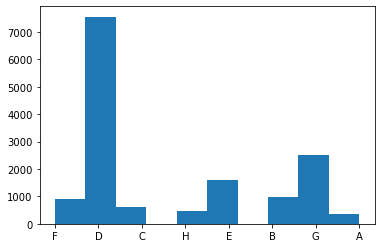

In [115]:
plt.hist(df_train['category'])
plt.show()

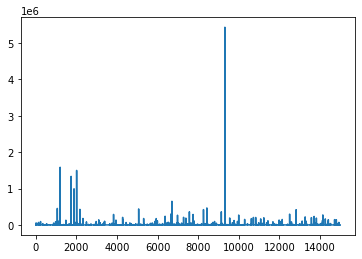

In [116]:
plt.plot(df_train['adview'])
plt.show()

In [117]:
df_train=df_train[df_train['adview']<2000000]
#Removinf outliers

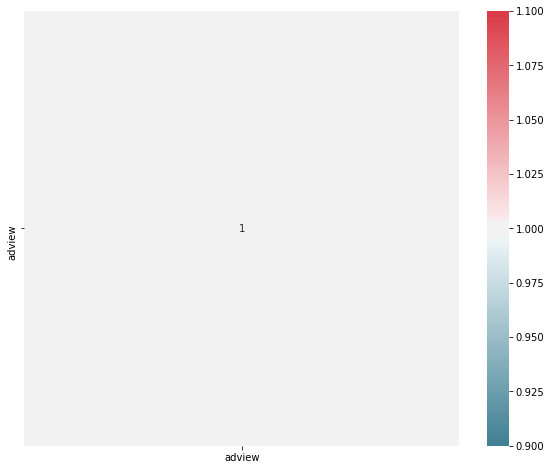

In [118]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = df_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [119]:
df_train

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


### DATA CLEANING

In [120]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}

In [121]:
df_train['category']=df_train['category'].map(category)
#Assigning numeric values to categories

In [122]:
df_train['category'].unique()

array([6, 4, 3, 8, 5, 2, 7, 1], dtype=int64)

In [123]:
df_train=df_train[df_train['views']!='F']
df_train=df_train[df_train['likes']!='F']
df_train=df_train[df_train['comment']!='F']
df_train=df_train[df_train['dislikes']!='F']
#Removing character 'F' value from particular columns

In [124]:
df_train

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,1
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,4
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,2
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,7


In [125]:
#converting values to integers for views,likes,dislikes,comment,adview
df_train["adview"]=pd.to_numeric(df_train["adview"])

In [126]:
df_train["views"]=pd.to_numeric(df_train["views"])

In [127]:
df_train["likes"]=pd.to_numeric(df_train["likes"])

In [128]:
df_train["comment"]=pd.to_numeric(df_train["comment"])

In [129]:
df_train["dislikes"]=pd.to_numeric(df_train["dislikes"])

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14636 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14636 non-null  object
 1   adview     14636 non-null  int64 
 2   views      14636 non-null  int64 
 3   likes      14636 non-null  int64 
 4   dislikes   14636 non-null  int64 
 5   comment    14636 non-null  int64 
 6   published  14636 non-null  object
 7   duration   14636 non-null  object
 8   category   14636 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.1+ MB


In [131]:
column_vidid=df_train['vidid']

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
df_train['vidid']=LabelEncoder().fit_transform(df_train['vidid'])

In [134]:
df_train['published']=LabelEncoder().fit_transform(df_train['published'])

In [135]:
df_train['duration']=LabelEncoder().fit_transform(df_train['duration'])

In [136]:
df_train.head(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4
5,517,4,78,0,0,0,2040,373,4
6,14479,40621,43118,15,1,0,1778,2218,4
7,4399,1,14205,55,16,1,2124,2750,5
8,5790,1,526015,3064,211,2582,1855,1385,6
9,12406,1,406992,3831,310,7839,2187,88,2


In [137]:
df_train['category'].unique()

array([6, 4, 3, 8, 5, 2, 7, 1], dtype=int64)

In [138]:
df_train.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [139]:
import datetime
import time

In [140]:
def check(x):
    y=x[2:]
    h=''
    m=''
    s=''
    mm=''
    P=['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h=mm
                mm=''
            elif(i=="M"):
                m=mm
                mm=''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(check)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)

df_train["duration"]=time1
df_train.head()        

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,420,6
1,2741,2,1707,56,2,6,2185,540,4
2,8138,1,2023,25,0,2,2094,120,3
3,9004,6,620860,777,161,153,2119,240,8
4,122,1,666,1,0,0,2091,0,4


In [141]:
# Split Data
Y = pd.DataFrame(data = df_train.iloc[:,1].values, columns = ['target'])
df_train=df_train.drop(["adview"],axis=1)
df_train=df_train.drop(["vidid"],axis=1)
df_train.head()



,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,420,6
1,1707,56,2,6,2185,540,4
2,2023,25,0,2,2094,120,3
3,620860,777,161,153,2119,240,8
4,666,1,0,0,2091,0,4


In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, Y, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [143]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.17381264062741902

In [144]:
df_train

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,420,6
1,1707,56,2,6,2185,540,4
2,2023,25,0,2,2094,120,3
3,620860,777,161,153,2119,240,8
4,666,1,0,0,2091,0,4
...,...,...,...,...,...,...,...
14994,525949,1137,83,86,1683,360,1
14995,665673,3849,156,569,1838,180,4
14996,3479,16,1,1,1053,180,2
14997,963,0,0,0,222,0,7


In [145]:
X_train

array([[6.27970800e-04, 4.12227296e-04, 1.82005703e-04, ...,
        5.10700797e-01, 4.25531915e-03, 4.28571429e-01],
       [1.02842406e-02, 3.12517617e-03, 7.32067383e-03, ...,
        6.49181704e-01, 1.36170213e-01, 8.57142857e-01],
       [1.88608556e-04, 6.69428942e-05, 0.00000000e+00, ...,
        4.05371381e-01, 2.83687943e-03, 7.14285714e-01],
       ...,
       [1.48331209e-03, 3.03004679e-04, 7.07799956e-04, ...,
        5.19093580e-01, 4.25531915e-03, 4.28571429e-01],
       [9.86119882e-03, 4.87626135e-03, 1.53087019e-02, ...,
        9.00125892e-01, 5.67375887e-03, 8.57142857e-01],
       [2.87646701e-04, 4.29843847e-04, 1.21337135e-04, ...,
        9.39991607e-02, 7.09219858e-03, 4.28571429e-01]])

In [146]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))



### LINEAR REGRESSION

In [147]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.8322578945595
Mean Squared Error: 835653609.0203481
Root Mean Squared Error: 28907.673877715377


### SUPPORT VECTOR REGRESSOR

In [148]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean Absolute Error: 3707.8322578945595
Mean Squared Error: 835653609.0203481
Root Mean Squared Error: 28907.673877715377


### DECISION TREE REGRESSOR

In [149]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2256.471994535519
Mean Squared Error: 632617291.8668033
Root Mean Squared Error: 25151.884459554978


### RANDOM FOREST REGRESSOR

In [150]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

<ipython-input-150-a96443493886>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3217.5791179834646
Mean Squared Error: 518305130.9368938
Root Mean Squared Error: 22766.315708451682


### ARTIFICIAL NEURAL NETWORK

In [151]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 1ms/step - loss: 767407808.0000 - mean_squared_error: 767407808.0000
Epoch 2/100
366/366 [==============================] - 1s 1ms/step - loss: 767406272.0000 - mean_squared_error: 767406272.0000
Epoch 3/100
366/366 [==============================] - 1s 1ms/step - loss: 767401152.0000 - mean_squared_error: 767401152.0000
Epoch 4/100
366/366 [==============================] - 1s 1ms/step - loss: 767387456.0000 - mean_squared_error: 767387456.0000
Epoch 5/100
366/366 [==============================] - 1s 1ms/step - loss: 767357440.0000 - mean_squared_error: 767357440.0000
Epoch 6/100
366/366 [==============================] - 1s 1ms/step - loss: 767306944.0000 - mean_squared_error: 767306944.0000
Epoch 7/100
366/366 [==============================] - 1s 1ms/step - loss: 767235648.0000 - mean_squared_error: 767235648.0000
Epoch 8/100
366/366 [==============================] - 1s 1ms/step - loss: 767146624.0000 - mean_squared_error:

366/366 [==============================] - 1s 2ms/step - loss: 763737600.0000 - mean_squared_error: 763737600.0000
Epoch 66/100
366/366 [==============================] - 1s 2ms/step - loss: 763731264.0000 - mean_squared_error: 763731264.0000
Epoch 67/100
366/366 [==============================] - 1s 2ms/step - loss: 763723520.0000 - mean_squared_error: 763723520.0000
Epoch 68/100
366/366 [==============================] - 1s 2ms/step - loss: 763715456.0000 - mean_squared_error: 763715456.0000
Epoch 69/100
366/366 [==============================] - 1s 2ms/step - loss: 763708416.0000 - mean_squared_error: 763708416.0000
Epoch 70/100
366/366 [==============================] - 1s 2ms/step - loss: 763702144.0000 - mean_squared_error: 763702144.0000
Epoch 71/100
366/366 [==============================] - 1s 1ms/step - loss: 763693696.0000 - mean_squared_error: 763693696.0000
Epoch 72/100
366/366 [==============================] - 1s 1ms/step - loss: 763687424.0000 - mean_squared_error: 7636

### PICKING THE BEST MODEL BASED ON ERROR AS WELL AS GENERALIZATION

In [152]:
#BASED ON ERROR DECISION TREE IS SELECTED AS THE BEST MODEL
#Decision tree is the best model based on error matrices.so it selected for pickling.


import joblib
joblib.dump(decision_tree, "Pickle_RL_Model.pkl")


### APPLYING BEST MODEL ON TEST.CSV

In [153]:
df_test=pd.read_csv('test.csv')

In [154]:
df_test

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,C
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,D
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,F
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,D


In [155]:
df_test.shape

(8764, 8)

In [156]:
# Removing character "F" present in data
df_test=df_test[df_test.views!='F']
df_test=df_test[df_test.likes!='F']
df_test=df_test[df_test.dislikes!='F']
df_test=df_test[df_test.comment!='F']
df_test.head()



,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [157]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
df_test["category"]=df_test["category"].map(category)
df_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [158]:
# Convert values to integers for views, likes, comments, dislikes and adview
# Convert values to integers for views, likes, comments, dislikes and adview
df_test["views"] = pd.to_numeric(df_test["views"])
df_test["comment"] = pd.to_numeric(df_test["comment"])
df_test["likes"] = pd.to_numeric(df_test["likes"])
df_test["dislikes"] = pd.to_numeric(df_test["dislikes"])




In [159]:
column_vidid=df_test['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
df_test['duration']=LabelEncoder().fit_transform(df_test['duration'])
df_test['vidid']=LabelEncoder().fit_transform(df_test['vidid'])
df_test['published']=LabelEncoder().fit_transform(df_test['published'])
df_test['vidid']=LabelEncoder().fit_transform(df_test['vidid'])
df_test['published']=LabelEncoder().fit_transform(df_test['published'])

In [160]:
df_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [161]:
# Convert Time_in_sec for duration
import datetime
import time

In [162]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i =="M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
            h = '00'
    if(m == ''):
            m = '00'
    if(s==''):
            s='00'
    bp = h+':'+m+':'+s
    return bp

test=pd.read_csv("test.csv")
mp = pd.read_csv( "test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

df_test["duration"]=time1


In [163]:
df_test=df_test.drop(["vidid"],axis=1)

In [164]:
df_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [165]:
df_test.isnull().sum()

views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [166]:
test=df_test.to_numpy()
test


array([[ 440238,    6153,     218, ...,    2053,     449,       2],
       [1040132,    8171,     340, ...,    1825,     389,       6],
       [  28534,      31,      11, ...,    1009,    2274,       4],
       ...,
       [1891692,    4606,    1109, ...,    1823,     434,       6],
       [ 714859,    1639,     151, ...,    1728,     195,       4],
       [   5297,      12,       1, ...,    1996,     614,       4]],
      dtype=int64)

### SAVING THE DECISION TREE MODEL AND LOADING IT

In [167]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(decision_tree,file)

In [168]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model


DecisionTreeRegressor()

In [169]:
#Scaling the data
scaler = MinMaxScaler()
test=scaler.fit_transform(test)

In [170]:
#predicting fot test values
predicts=Pickled_LR_Model.predict(test)
predicts

array([5.000e+00, 1.400e+01, 1.000e+00, ..., 1.200e+01, 4.000e+00,
       1.343e+03])

In [172]:
predicts.tofile('predictions.csv', sep = ',')

##### predicts.csv contains the adview column 